# Part 3: Exploring Patterns in Game of Life

In the final part of this tutorial, we investigate how interesting patterns and behaviors can emerge over time from even a simple CA. Using Game of Life, we start at the most basic level, still lifes, then slowly build our way up to more complex examples. We conclude with a look at transmitting information signals and creating logic gates using only the rules of Game of Life.

Before we start, we need to set up our boilerplate code by pulling from our Part 1 implementation (conway_basic.py). We also define a new function called *plot_series*, which allows us to plot a few subsequent timesteps in a row.

In [1]:
import os
import sys
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# this code allows us to import functions from our full scripts
module_path = os.path.abspath(os.path.join('../scripts'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import functions from basic implementation as helper functions
from conway_basic import plot_world, timeseries

# generic timeseries plotting
def plot_series(world, steps):
    series = timeseries(world, steps)

    fig, ax = plt.subplots(1, steps)

    for i in range(0, steps):
        ax[i].pcolor(series[i], cmap=cmap, edgecolor="black")
        ax[i].axis('square')
        if not i == 0:
            ax[i].yaxis.set_visible(False)
        ax[i].set_title("t = " + str(i))

    plt.show()

### 3.1 Still Lifes

The simplest patterns that emerge within Game of Life are those known as *still lifes*. These are fixed patterns that do not change from generation to generation.

As a note before we jump into the code, all of these worlds are created using hardcoded initialization functions in order to effectively demonstrate the patterns. We do not include these functions as part of the tutorial, as they are simply setting values in the initial NumPy array, but if one is interested, they can be found in pattern_worlds.py.

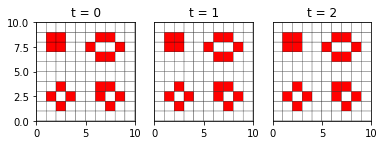

In [14]:
# import world init function
from pattern_worlds import init_fixed_world

world = init_fixed_world()
plot_series(world, 3)

Here we see four different still lifes. In clockwise order around the grid, these are termed *block*, *beehive*, *boat*, and *tub*.

Although still lifes on their own are trivial, they are still important to understand because they are often integral components to constructing more complicated patterns, which we will investigate further on. For example, certain still lifes are known as *eaters*, which means that they have the ability to interact with and destroy certain patterns without suffering any permanent damage. These help stabilize and control debris that may arise in complex reactions. Similarly, another example is the concept of a *reflector*, which is a still life capable of reflecting certain patterns without receiving damage. 

As we will see later on, a block is able to serve as both, and is therefore one of the most important still lifes.

### 3.2 Oscillators

Moving up in complexity from still lifes, we come next to oscillators. These are patterns who return to their initial state after a finite number of generations (this number is known as the *period* of the oscillator).

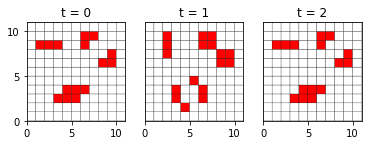

In [11]:
# import world init function
from pattern_worlds import init_oscillator_world

world = init_oscillator_world()  
plot_series(world, 3)

Here we see three examples of simple oscillators. In clockwise order around the grid, these are termed *blinker*, *beacon*, and *toad*. As you can see, after 2 timesteps they have returned to their initial state, giving each of them a period of 2. These are considered to be the most common oscillators.

Similarly to still lifes, oscillators can sometimes also act as eaters and reflectors, but less commonly so.

Another more interesting example is a *pulsar*, which, despite its apparent complexity, returns to its initial state after only 3 generations!

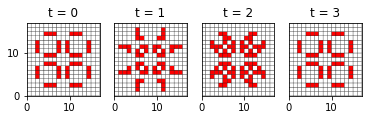

In [12]:
# import world init function
from pattern_worlds import init_pulsar_world

world = init_pulsar_world()
plot_series(world, 4)

### 3.3 Spaceships

So far, the patterns we've investigated don't really mean much. They may be interesting to look at (especially pulsars!), but on their own, their behavior is trivial. 

Stepping forward in complexity, we now investigate behaviors that *move*, which as we will see, have some fairly profound implications for what you can do with Game of Life. These behaviors are affectionately known as *spaceships*. Let's look at an example.

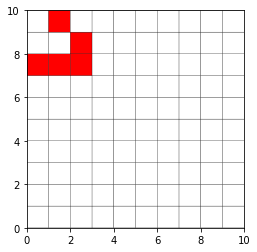

In [6]:
# import world init function
from pattern_worlds import init_glider_world

world = init_glider_world()
plot_world(world)

This is the initial configuration of a *glider*, which was the first spaceship discovered as well as the smallest and most common. Let's now view how it evolves over time.

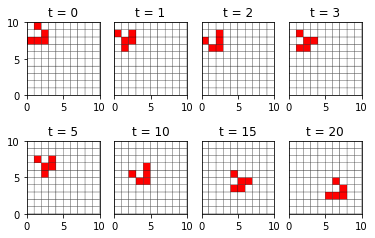

In [27]:
def plot_glider_series():
    world = init_glider_world()
    series = timeseries(world, 25)
    
    fig, ax = plt.subplots(2, 4)

    for i in range(0, 4):
        ax[0, i].pcolor(series[i], cmap=cmap, edgecolor="black")
        ax[0, i].axis('square')
        ax[0, i].set_title("t = " + str(i))
        
        ax[1, i].pcolor(series[(i + 1) * 5], cmap=cmap, edgecolor="black")
        ax[1, i].axis('square')
        ax[1, i].set_title("t = " + str((i + 1) * 5))
        
        if not i == 0:
            ax[0, i].yaxis.set_visible(False)
            ax[1, i].yaxis.set_visible(False)

    plt.show()
    
plot_glider_series()

In the above graph, we show timesteps $t = 0$ through $t = 3$ to demonstrate the period of a glider ($t = 4$ will return to the initial configuration, therefore the period is 5 generations). 

Then, timesteps $t = 5$ to $t = 20$ are plotted in steps of 5 to demonstrate how a glider evolves over time. Every 5 steps, a glider translates one cell diagonally (to the right and downward). Different directions can be achieved by rotating the initial configuration. This continues indefinitely until it hits a boundary or other active cells.

#### Generating Gliders

Now that we have introduced gliders, we can take it a step further by exploring a construction that can spontaneously and indefinitely produce these gliders. These types of structures are known as *guns*, and the subject of our study today is *Gosper's glider gun* (named after mathematician Bill Gosper, who discovered it in 1970). Below is a demonstration of it.

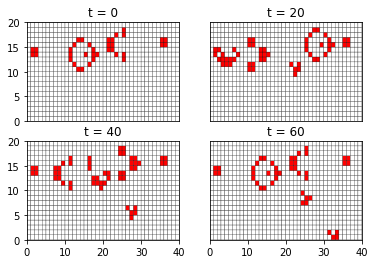

In [12]:
# import world init function
from pattern_worlds import init_glider_gun

def plot_gun_series():
    world = init_glider_gun()
    series = timeseries(world, 100)
    
    fig, ax = plt.subplots(2, 2)

    for i in range(0, 2):
        for j in range(0, 2):
            ax[i, j].pcolor(series[(i * 2 + j) * 20], cmap=cmap, edgecolor="black")
            ax[i, j].set_title("t = " + str((i * 2 + j) * 20))
        
            if not j == 0:
                ax[i, j].yaxis.set_visible(False)
                
            if i == 0:
                ax[i, j].xaxis.set_visible(False)

    plt.show()
    
plot_gun_series()

$t = 0$ demonstrates the initial structure of the gun.  The two structures in the middle oscillate back and forth, and the two blocks on the edges serve as stabilizers, reflecting the structures.

$t = 20$ demonstrates how, after a collision in the center of the gun, a glider has been created. $t = 40$ demonstrates an in-progress collision, and $t = 60$ shows how it has returned to an initial configuration with two gliders having been spawned. Based on this, the period of the glider gun is 30 generations, with one glider created per period. 

Lastly, for those viewing this tutorial in Jupyter notebook rather than PDF format, below is a GIF demonstrating an animation of Gosper's glider gun for a clearer view of what is happening.

![SegmentLocal](../res/glider-gun.gif "segment")
<p style="text-align: center;">Source: http://www.conwaylife.com/w/images/b/b6/Gosperglidergun.gif</p>

### 3.4 Information Signals and Logic Gates

As the culminating topic of this tutorial, we now look into how we can transmit information and create logic gates using Game of Life. Having covered gliders and glider guns, we have the tools necessary to do so.

In this case, we can consider a stream of gliders as an information signal. Thinking of binary, gliders represent 1 (True), and no gliders represents 0 (False). Two streams of gliders that collide in a certain way will annihilate each other. 

With these glider guns in hand and little bit of cleverness, we can direct streams of gliders in specific ways to create NOT, OR and AND gates!

Since the behaviors and construction of these can be quite complicated, we utilize an open source program called [Golly](http://golly.sourceforge.net/) to generate and view the behavior of these logic gates.

#### 3.4.a NOT Gate

A NOT gate takes in one input and outputs the reverse.

<img src="../res/NOT (1).png" style="width:400px;height=250px;">
<p style="text-align: center;">NOT Gate with negative input</p>

<img src="../res/NOT (2).png" style="width:100%;height=250px;">
<p style="text-align: center;">NOT Gate with positive input</p>

To build our gate, we use a glider gun and an input stream of gliders. If the input is negative, the glider gun stream will continue uninhibited, resulting in a positive output (the top image). If the input is positive (i.e. there are gliders), then the input will collide with the output from the glider gun and both will be annihilated, thus making the output negative (this is represented by the bottom two images).
#### 3.4.b AND Gate

An AND gate only returns True if both inputs are True. It return False in every other case. To build our gate, we use two glider guns directed to the right as inputs, and a glider directed to the left as our gate. Our output is any stream of gliders to the right.

<img src="../res/AND (1).png" style="width:400px;height=250px;">

In the first case above, A = True and B = True. B annihilates the stream going down the screen to the left, allowing A to move to the output, returning True.

<img src="../res/AND (2).png" style="width:400px;height=250px;">

In the second case, A = True and B = False. Since B is not transmitting, the signal from the gate collides with A, annihilating it and resulting in no output (False).

<img src="../res/AND (3).png" style="width:400px;height=250px;">

In the third case, A = False and B = True. Although B and the gate collide, A is not transmitting, so there is no output (False).

In the final case (which is not shown), A = False and B = False. Although the gate is transmitting to the left via the far right glider gun stream, there is no output to the right (False).

#### 3.4.c OR Gate

An OR gate returns True if at least one of the inputs are True. It only returns False if both are False.

We leave this gate as an exercise to the reader! Download Golly, build your glider guns, and play around with the inputs.


Since we can create NOT, OR, and AND gates in Game of Life, this means it is Turing Complete, or computationally universal! This shows that even in a simple CA, an impressive diversity of behaviors can emerge.